# Libraries

In [27]:
import os
from math import sqrt

# visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi': 120})
plt.style.use('fivethirtyeight')

# sklearn tools
from sklearn.feature_extraction.text import CountVectorizer

# nlp
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud, STOPWORDS

from collections import Counter

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Fetching

In [21]:
# define csv path
train_path = os.path.join("../data/train/Train.csv")
tags_path = os.path.join("../data/tags/Tags.csv")
test_path = os.path.join("../data/test/Test.csv")

In [22]:
# import data from csv files
df_train = pd.read_csv(train_path, low_memory=False)
df_tags = pd.read_csv(tags_path, low_memory=False)
df_test = pd.read_csv(test_path, low_memory=False)

# Data Scrapping

In [25]:
# visualize train/tags/test datasets
df_train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_test.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


In [26]:
df_tags.head()

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language


In [43]:
# dataset summary
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

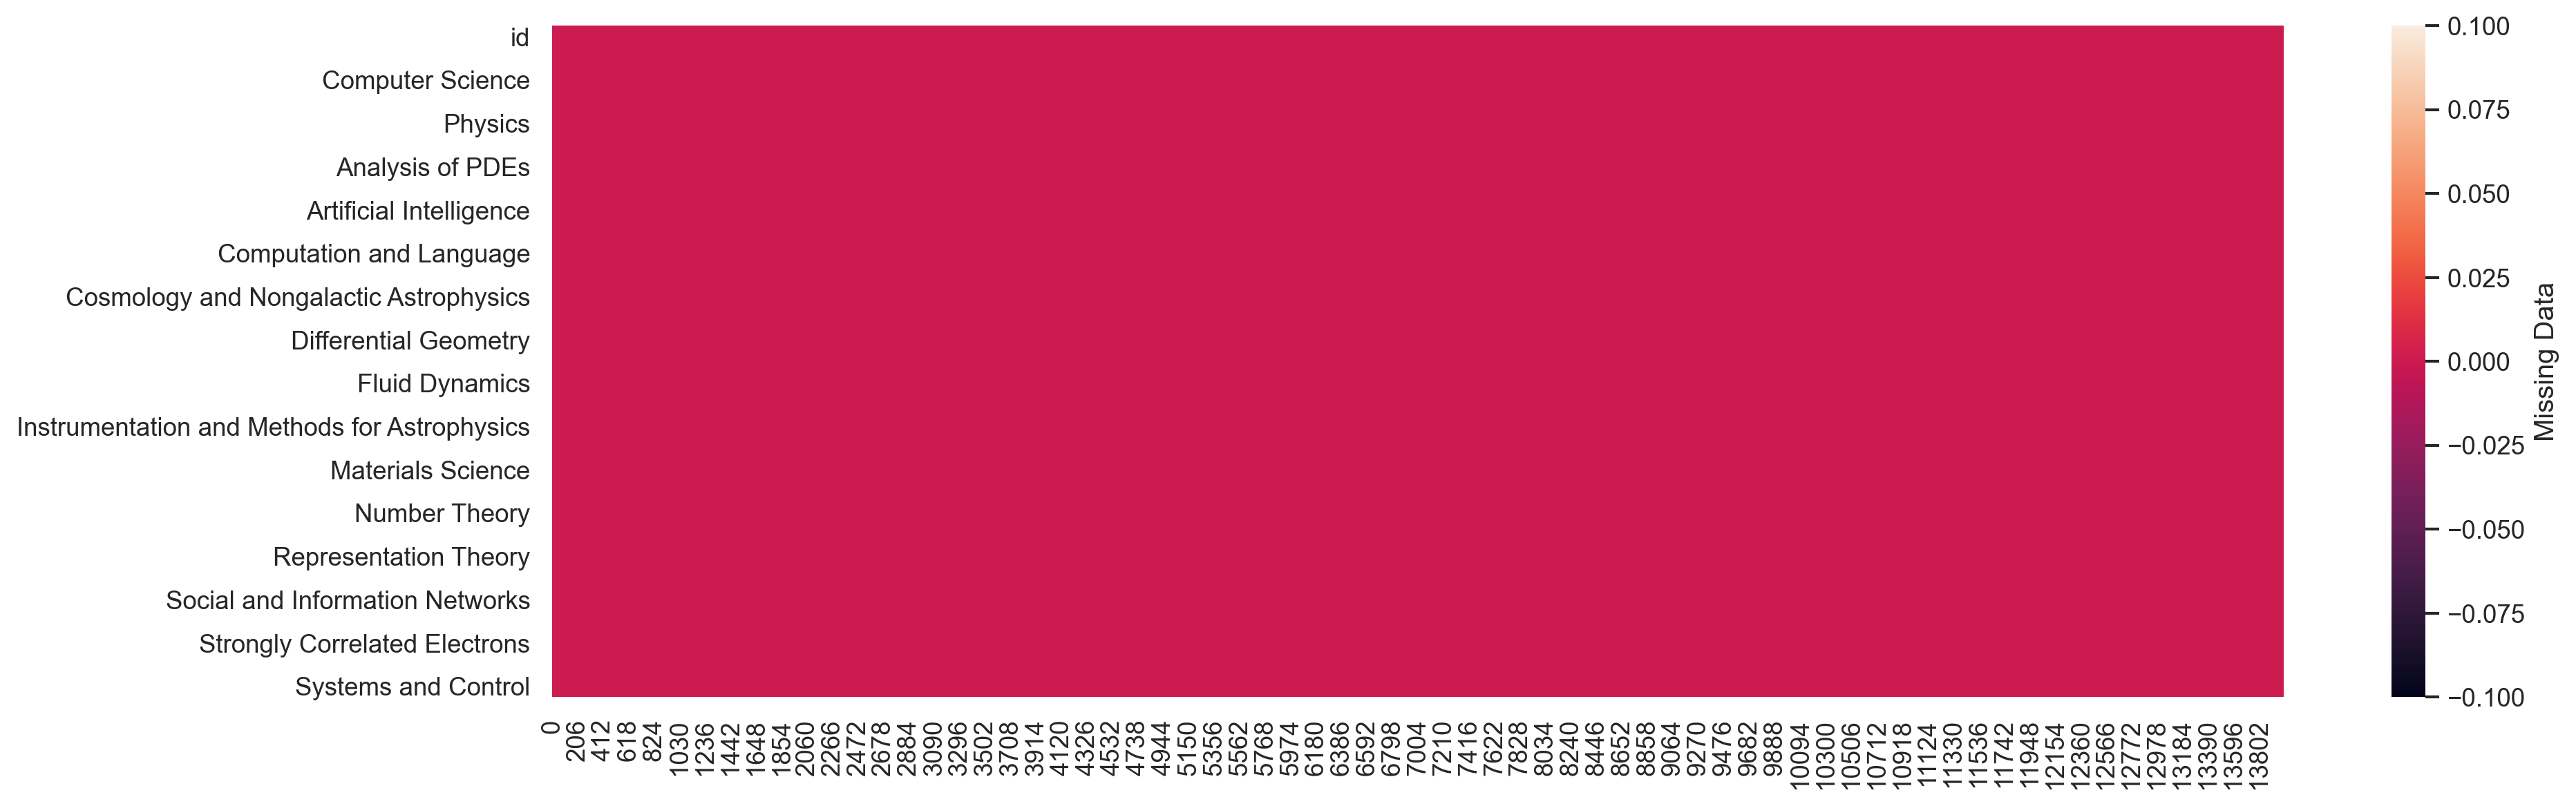

In [47]:
# check missing instancies
sns.set()
sns.heatmap(df_train.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})
plt.savefig("../reports/visualizing_missing_data_with_heatmap_Seaborn_Python.png")

In [37]:
# check duplicates 
df_train.duplicated(subset=['ABSTRACT']).value_counts()

False    14004
dtype: int64

# Exploratory data analysis

## Data Wrangling

In [41]:
# define topic/tags datasets for analysis
tags_cols = ['Analysis of PDEs', 'Applications',
               'Artificial Intelligence', 'Astrophysics of Galaxies',
               'Computation and Language', 'Computer Vision and Pattern Recognition',
               'Cosmology and Nongalactic Astrophysics',
               'Data Structures and Algorithms', 'Differential Geometry',
               'Earth and Planetary Astrophysics', 'Fluid Dynamics',
               'Information Theory', 'Instrumentation and Methods for Astrophysics',
               'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
               'Optimization and Control', 'Representation Theory', 'Robotics',
               'Social and Information Networks', 'Statistics Theory',
               'Strongly Correlated Electrons', 'Superconductivity',
               'Systems and Control']

topics_cols = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

## Data distribution

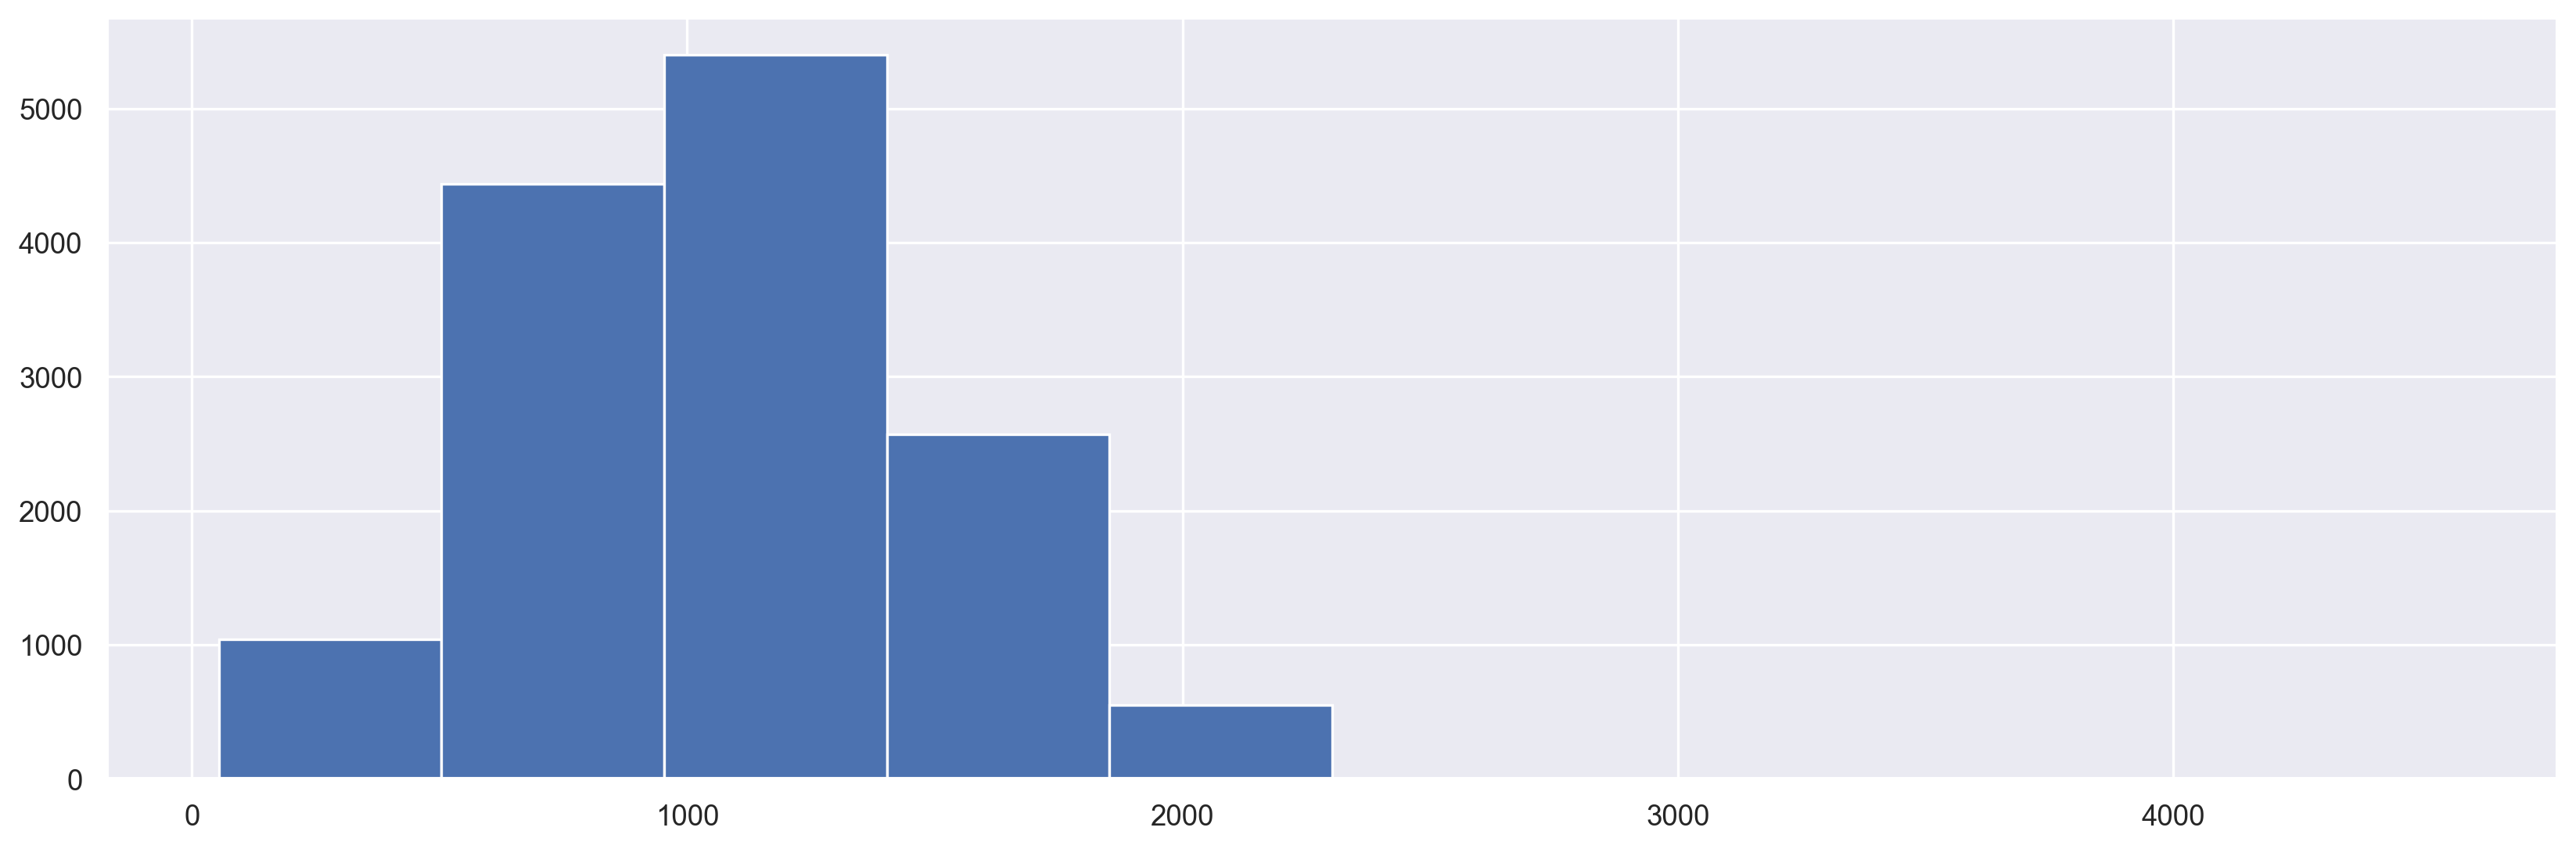

In [48]:
# plot character count per article
sns.set()
df_train['ABSTRACT'].str.len().hist()
plt.savefig("../reports/character_count.png")

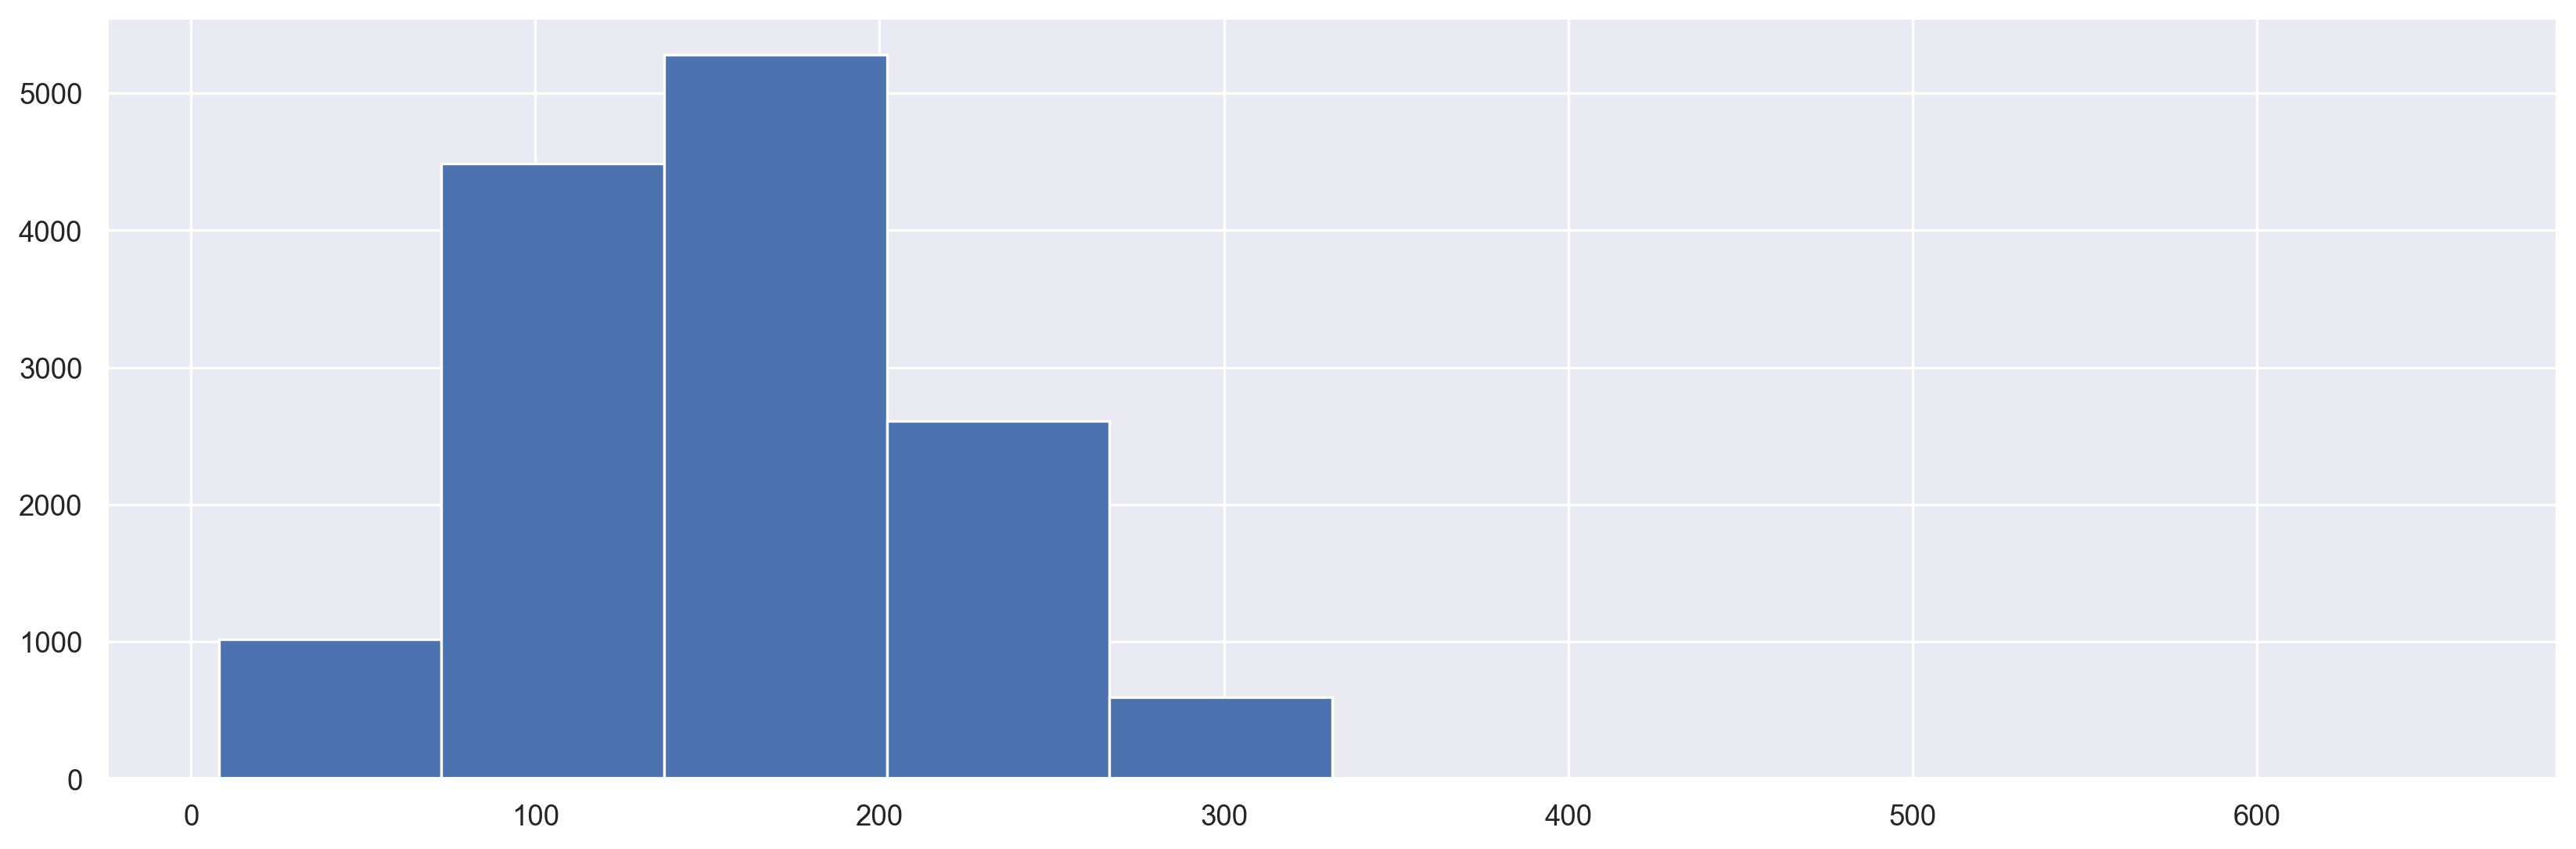

In [49]:
# plot word count per article
def plot_word_number_histogram(text):
    sns.set()
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.savefig("../reports/word_count.png")

plot_word_number_histogram(df_train['ABSTRACT'])

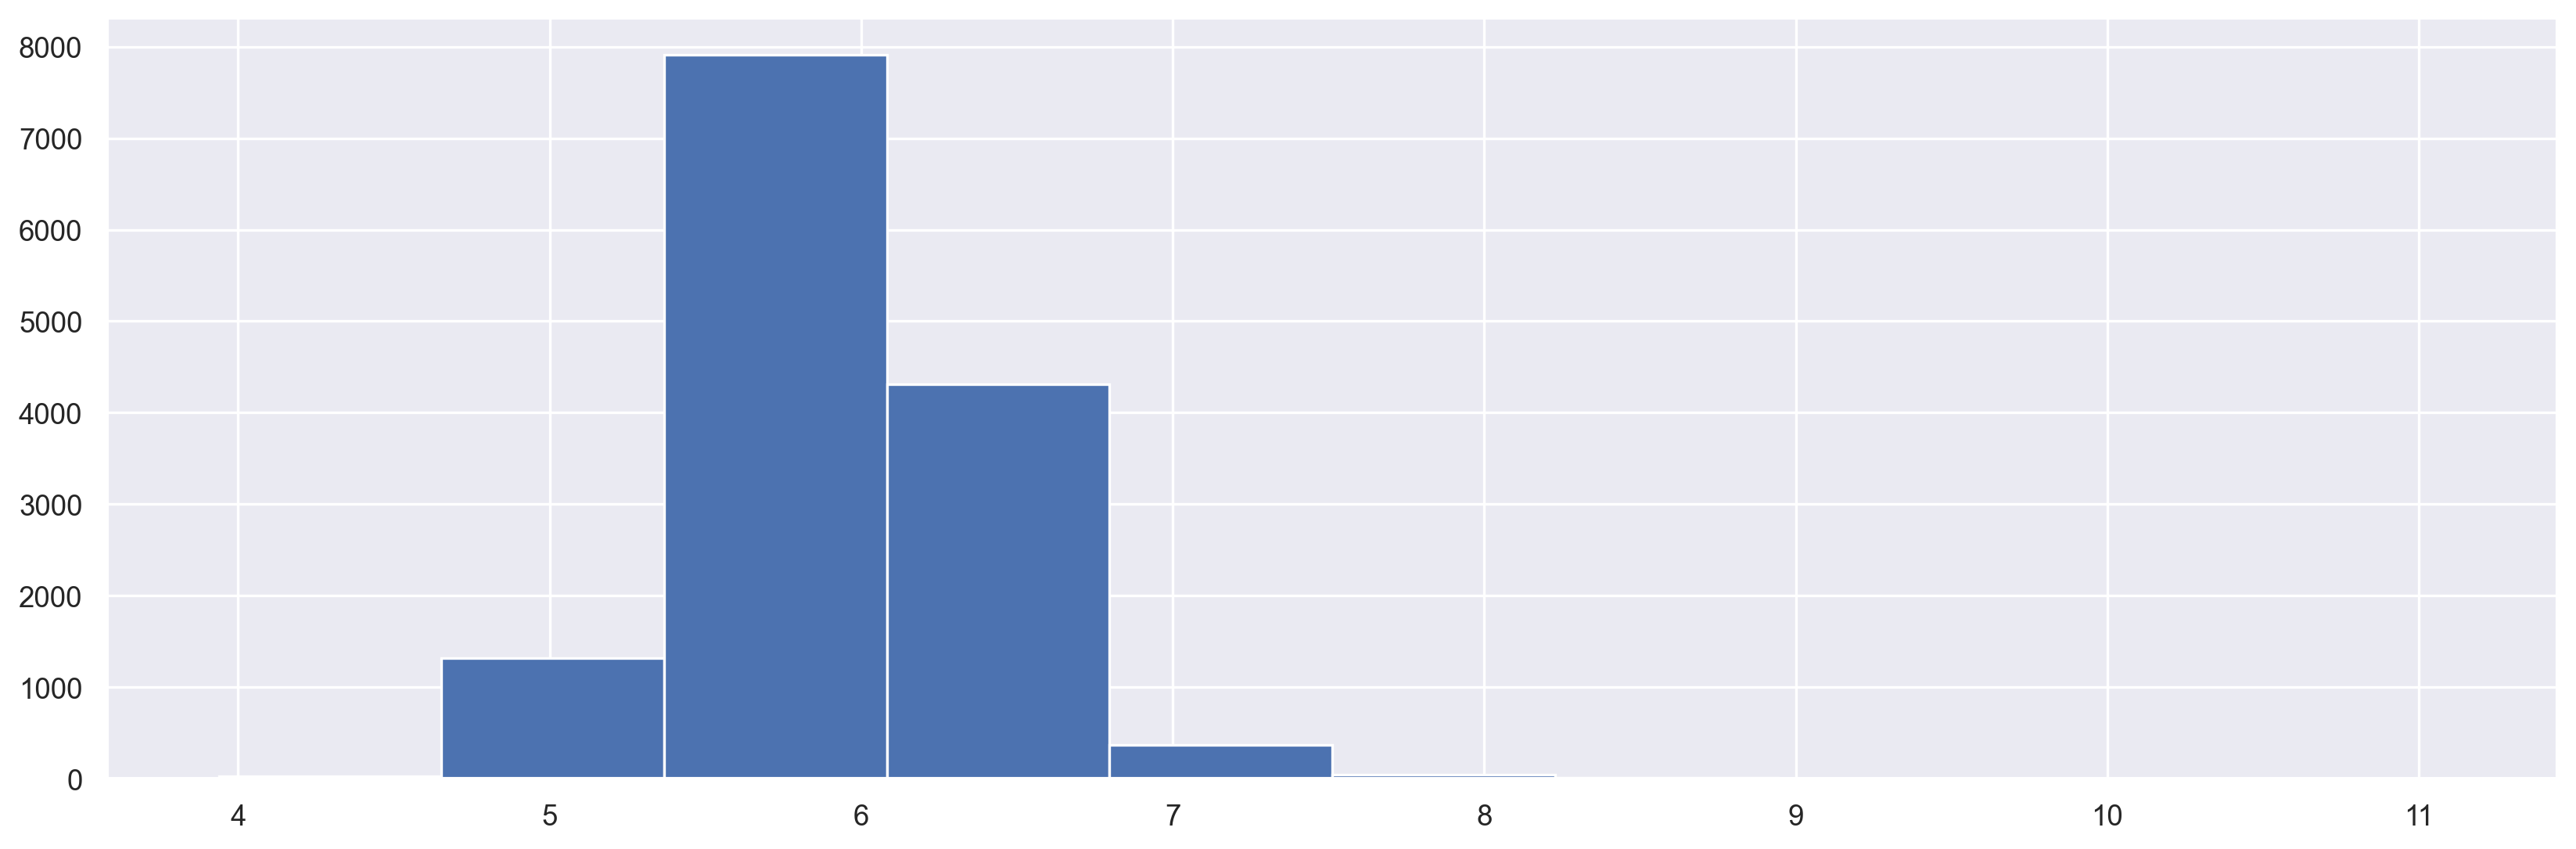

In [59]:
# plot average word length
def plot_word_length_histogram(text):
    sns.set()
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
    plt.savefig("../reports/avarage_word_length.png")

plot_word_length_histogram(df_train['ABSTRACT'])

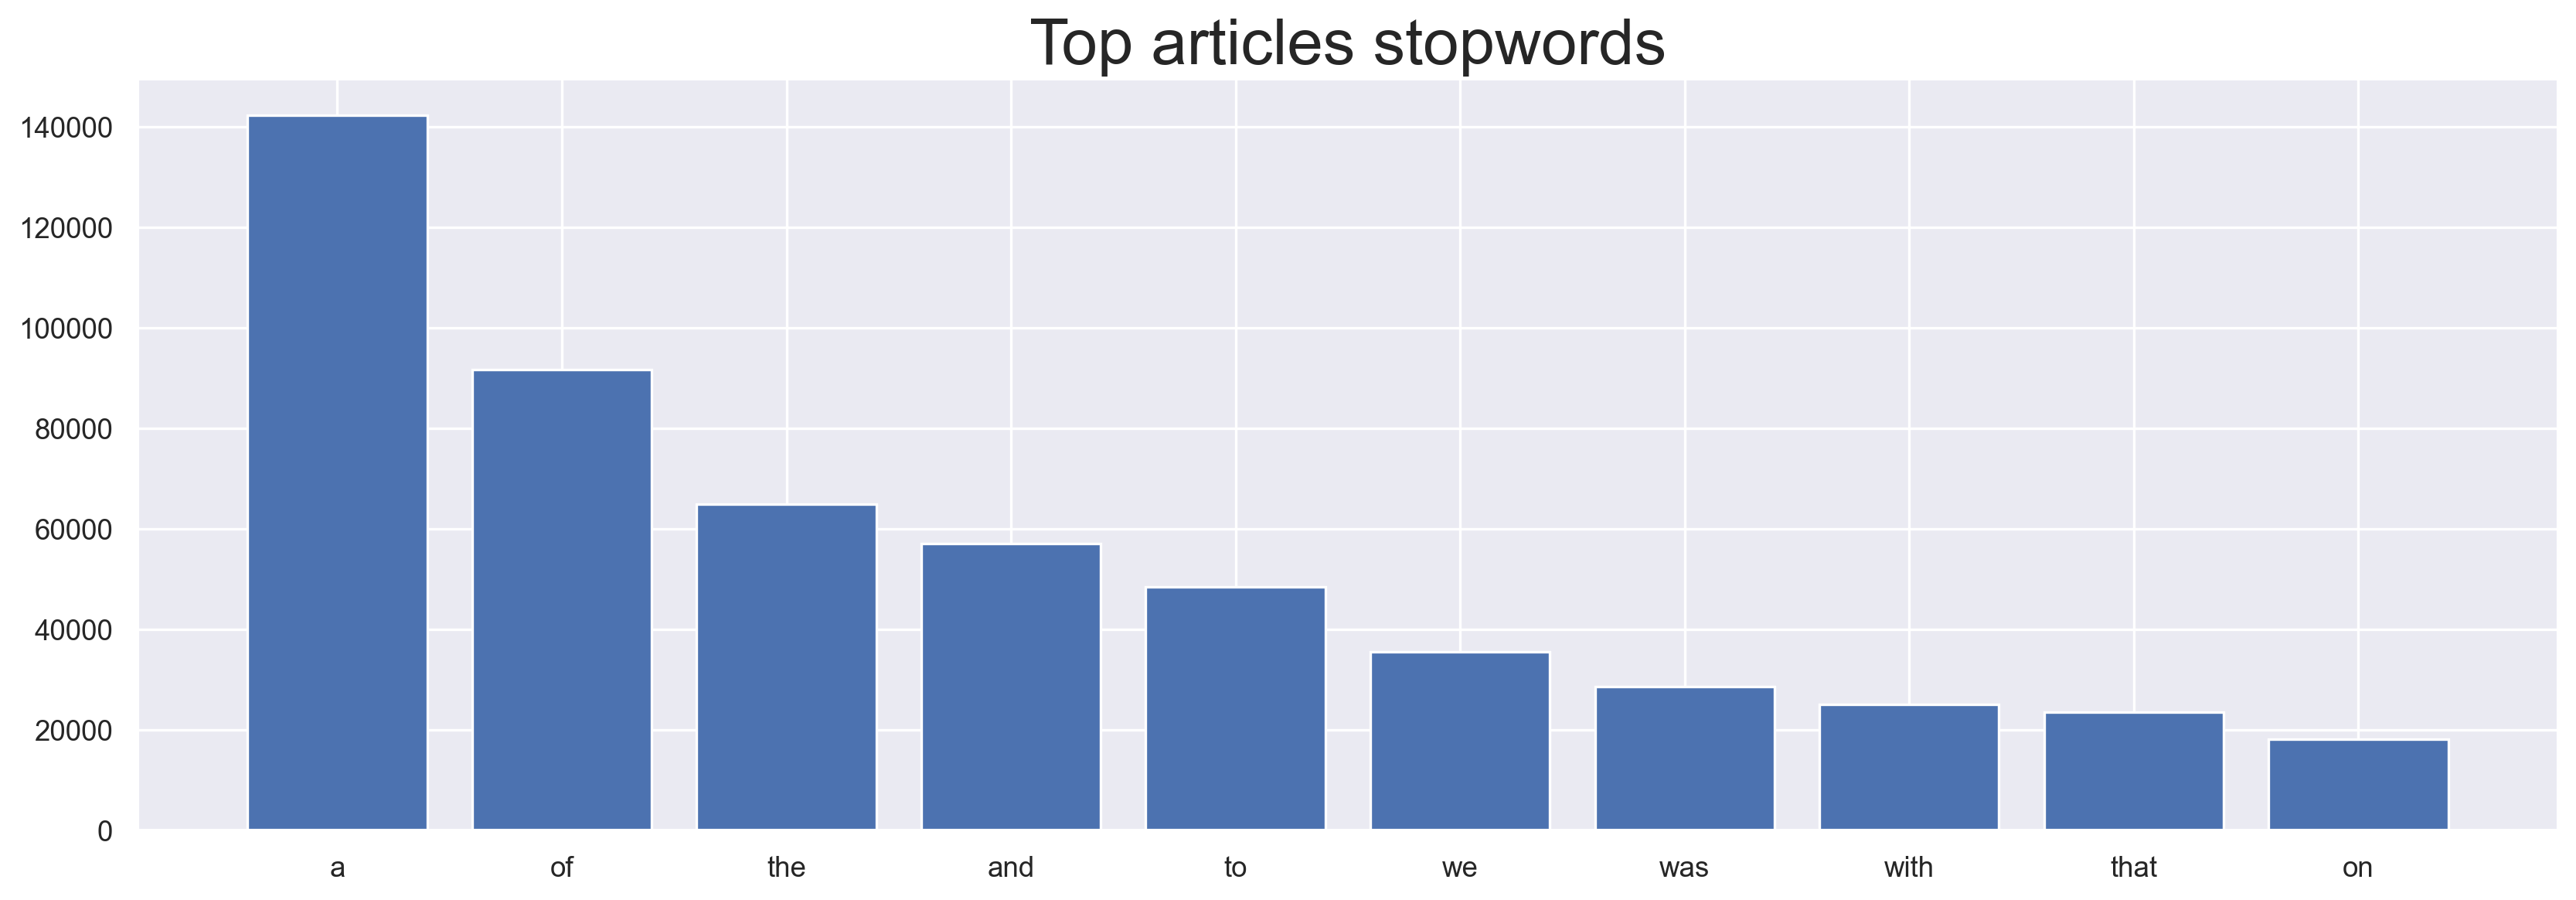

In [66]:
# define function to plot stopwords which occur most frequently
def plot_top_stopwords_barchart(text):
    # define stopwords dict (en-US)
    stop=set(stopwords.words('english'))
    # define corpus for stopwords
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    sns.set()
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] ## reverse stopwords plot sense
    x,y=zip(*top)
    plt.title('Top articles stopwords', fontsize=25)
    plt.bar(x,y)

plot_top_stopwords_barchart(df_train['ABSTRACT'])

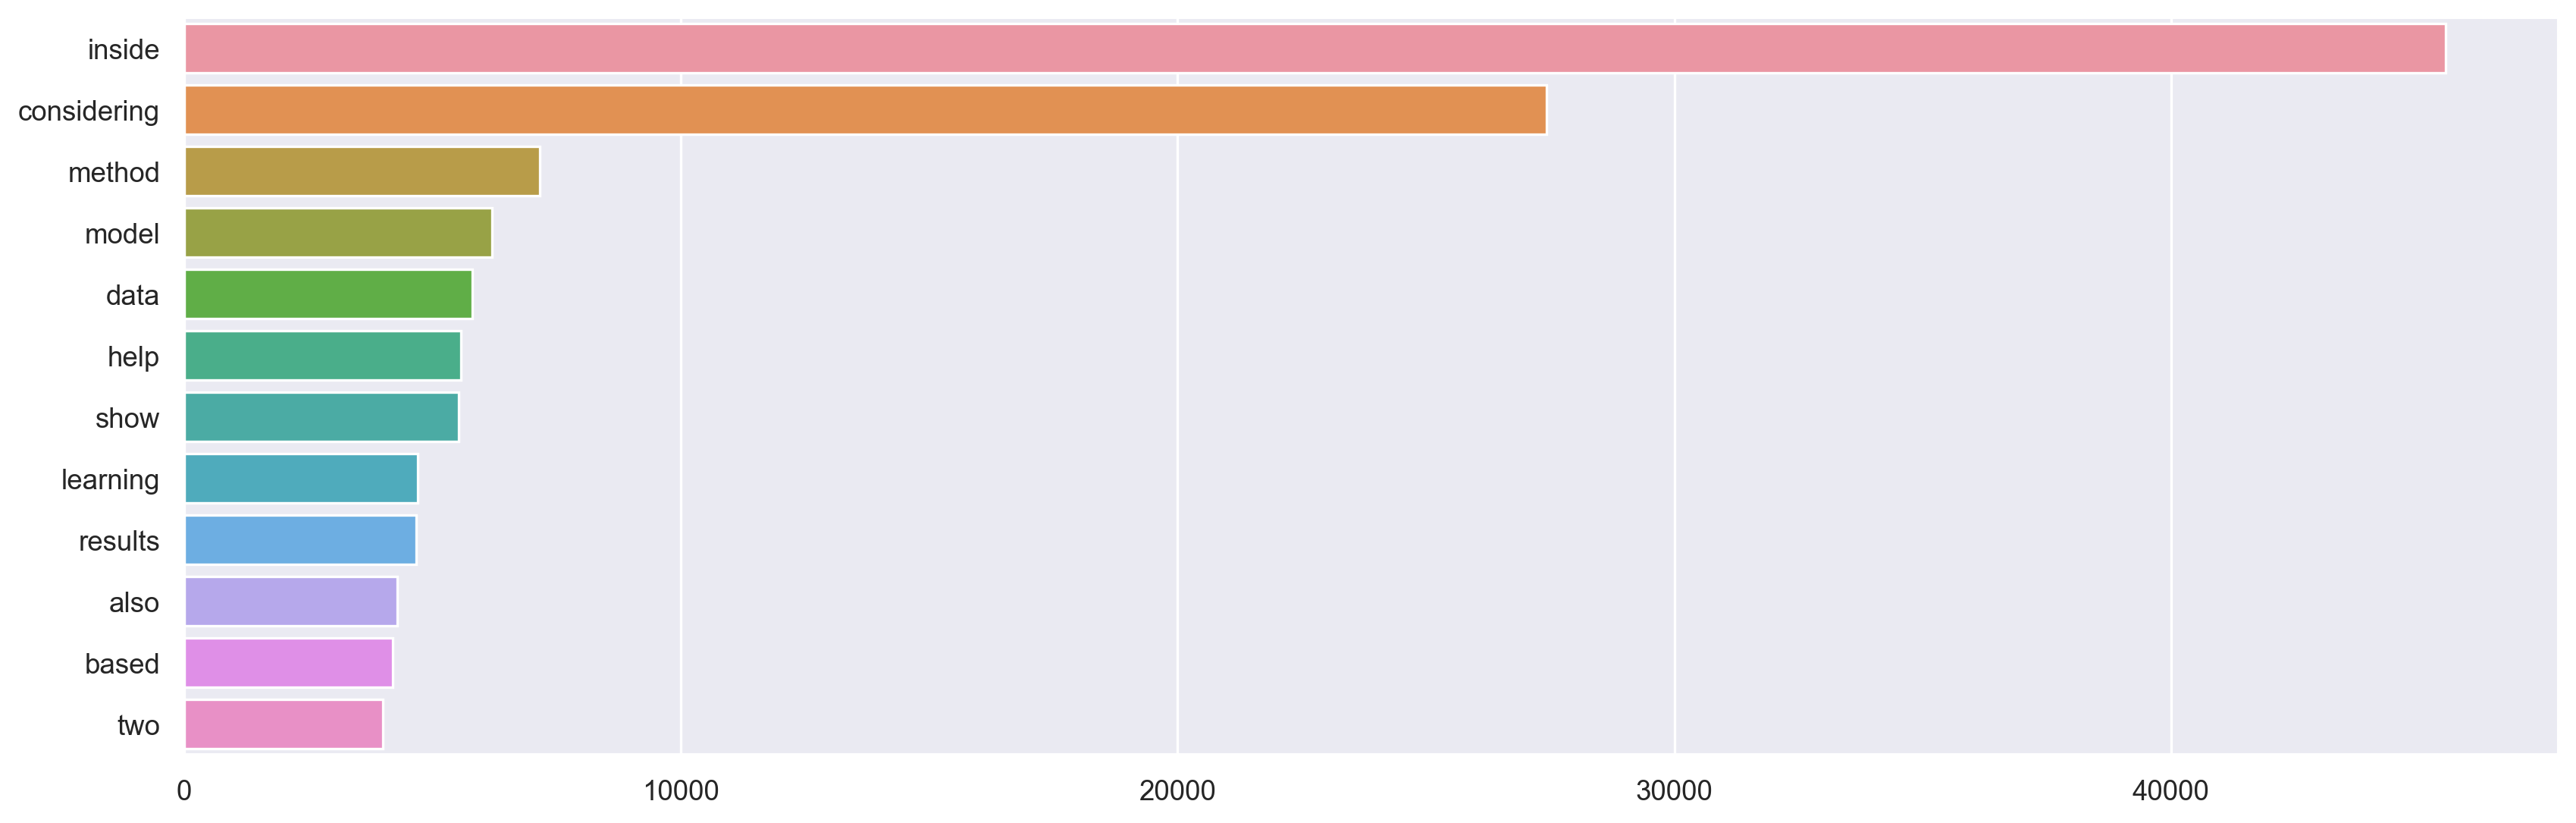

In [68]:
# define function to plot most frequent words
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new=text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.set()
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df_train['ABSTRACT'])

In [49]:
# plot wordclouds per article
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                        background_color ='white',
                        min_font_size = 15
                    ).generate(" ".join(data['ABSTRACT'].values))
                      
    plt.figure() 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

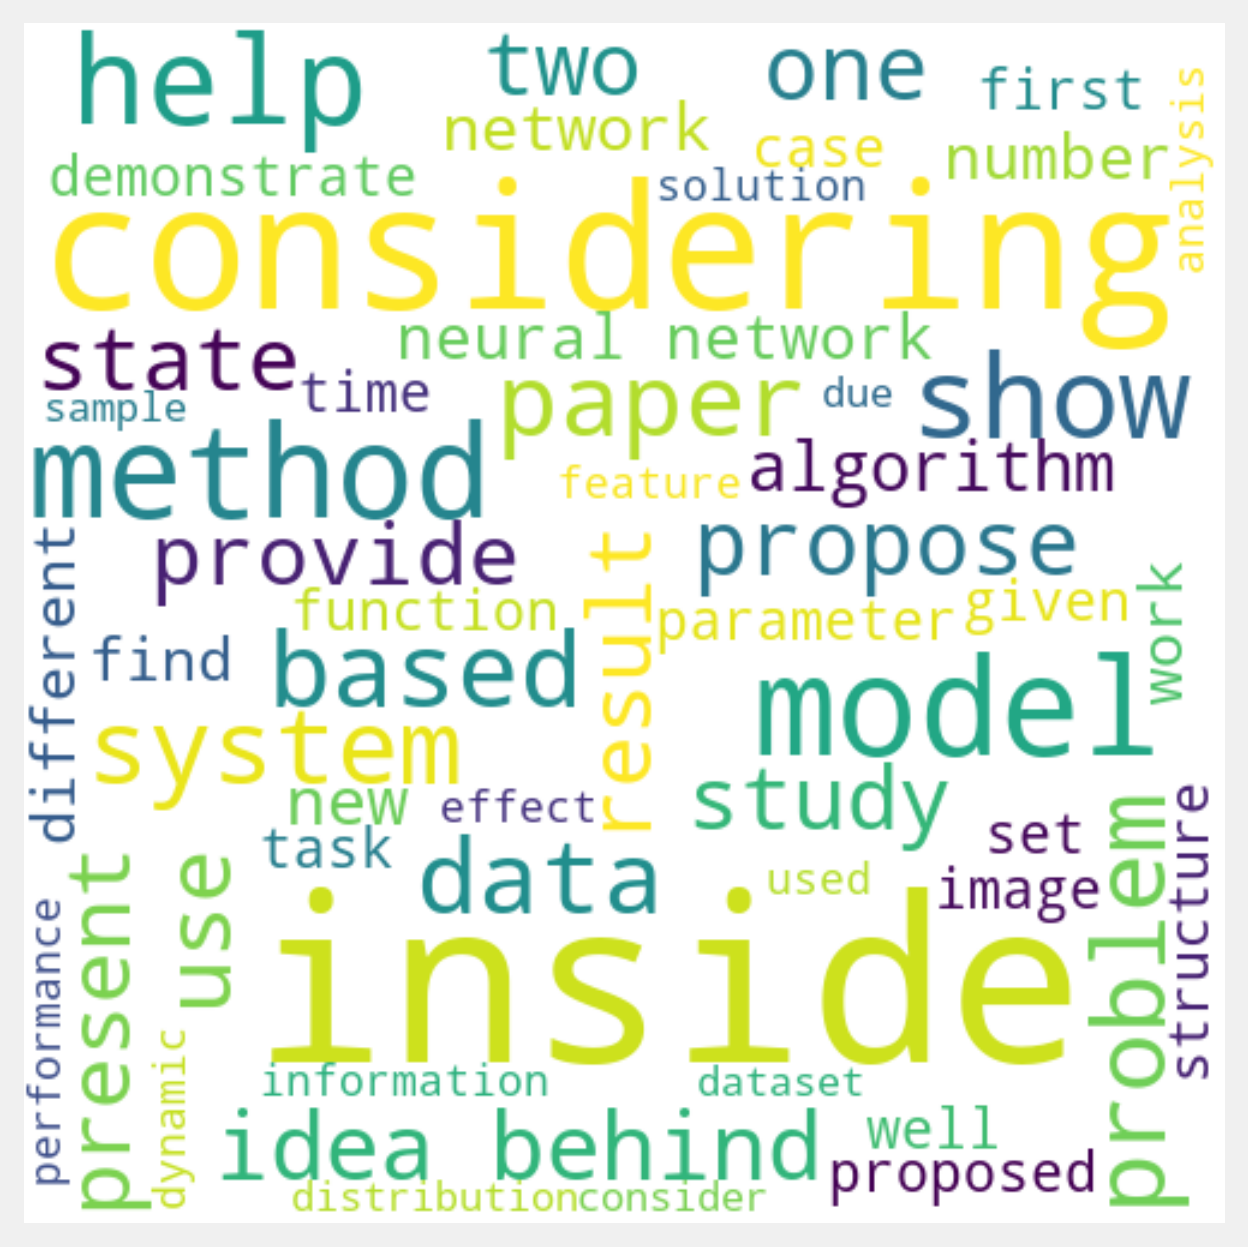

In [50]:
create_WordCloud(df_train)

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.    
If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

To build a representation of our vocabulary we will use Countvectorizer.      
 Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. It is available in sklearn.feature_engineering.text

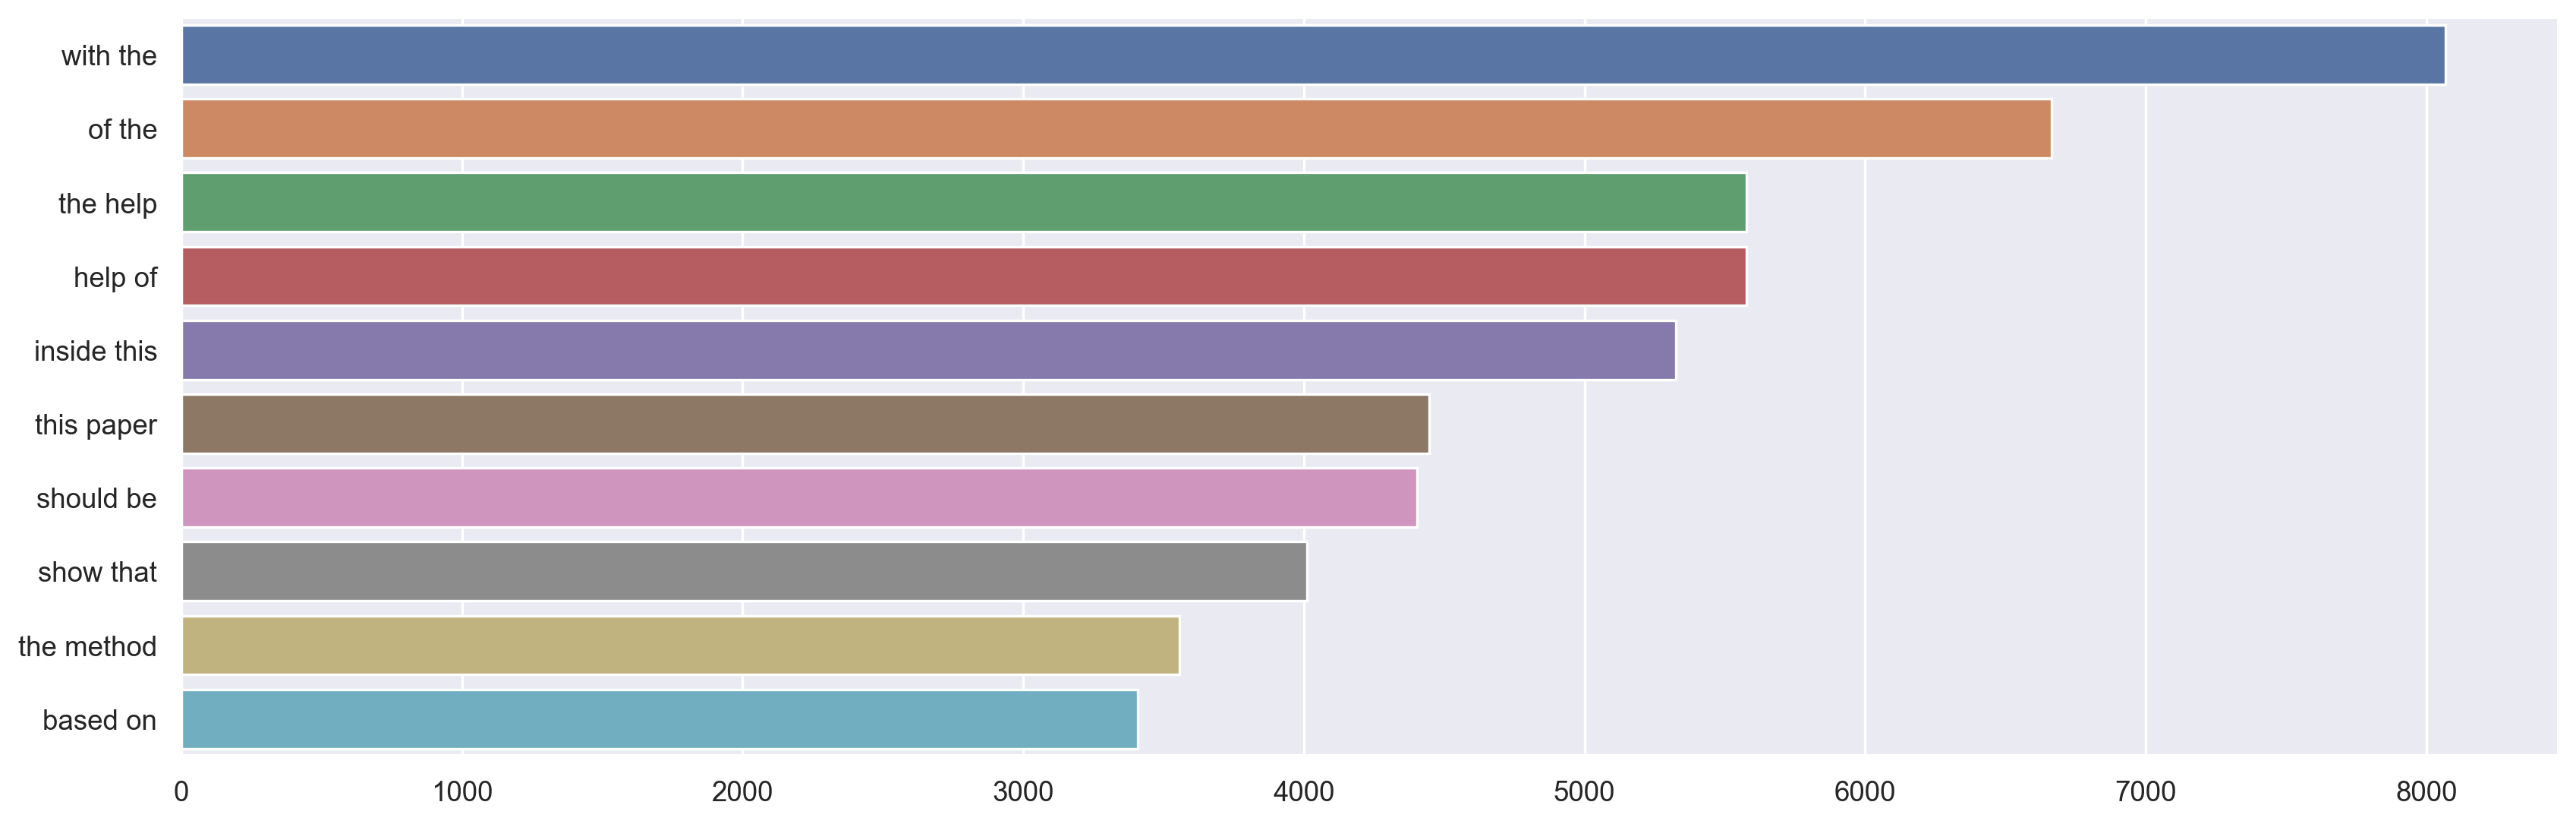

In [15]:
# define function to n_grams on each article
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    top_n_bigrams = words_freq[:10]
    x,y = map(list, zip(*top_n_bigrams))
    sns.set()
    sns.barplot(x=y,y=x)

get_top_ngram(df_train['ABSTRACT'], 2)

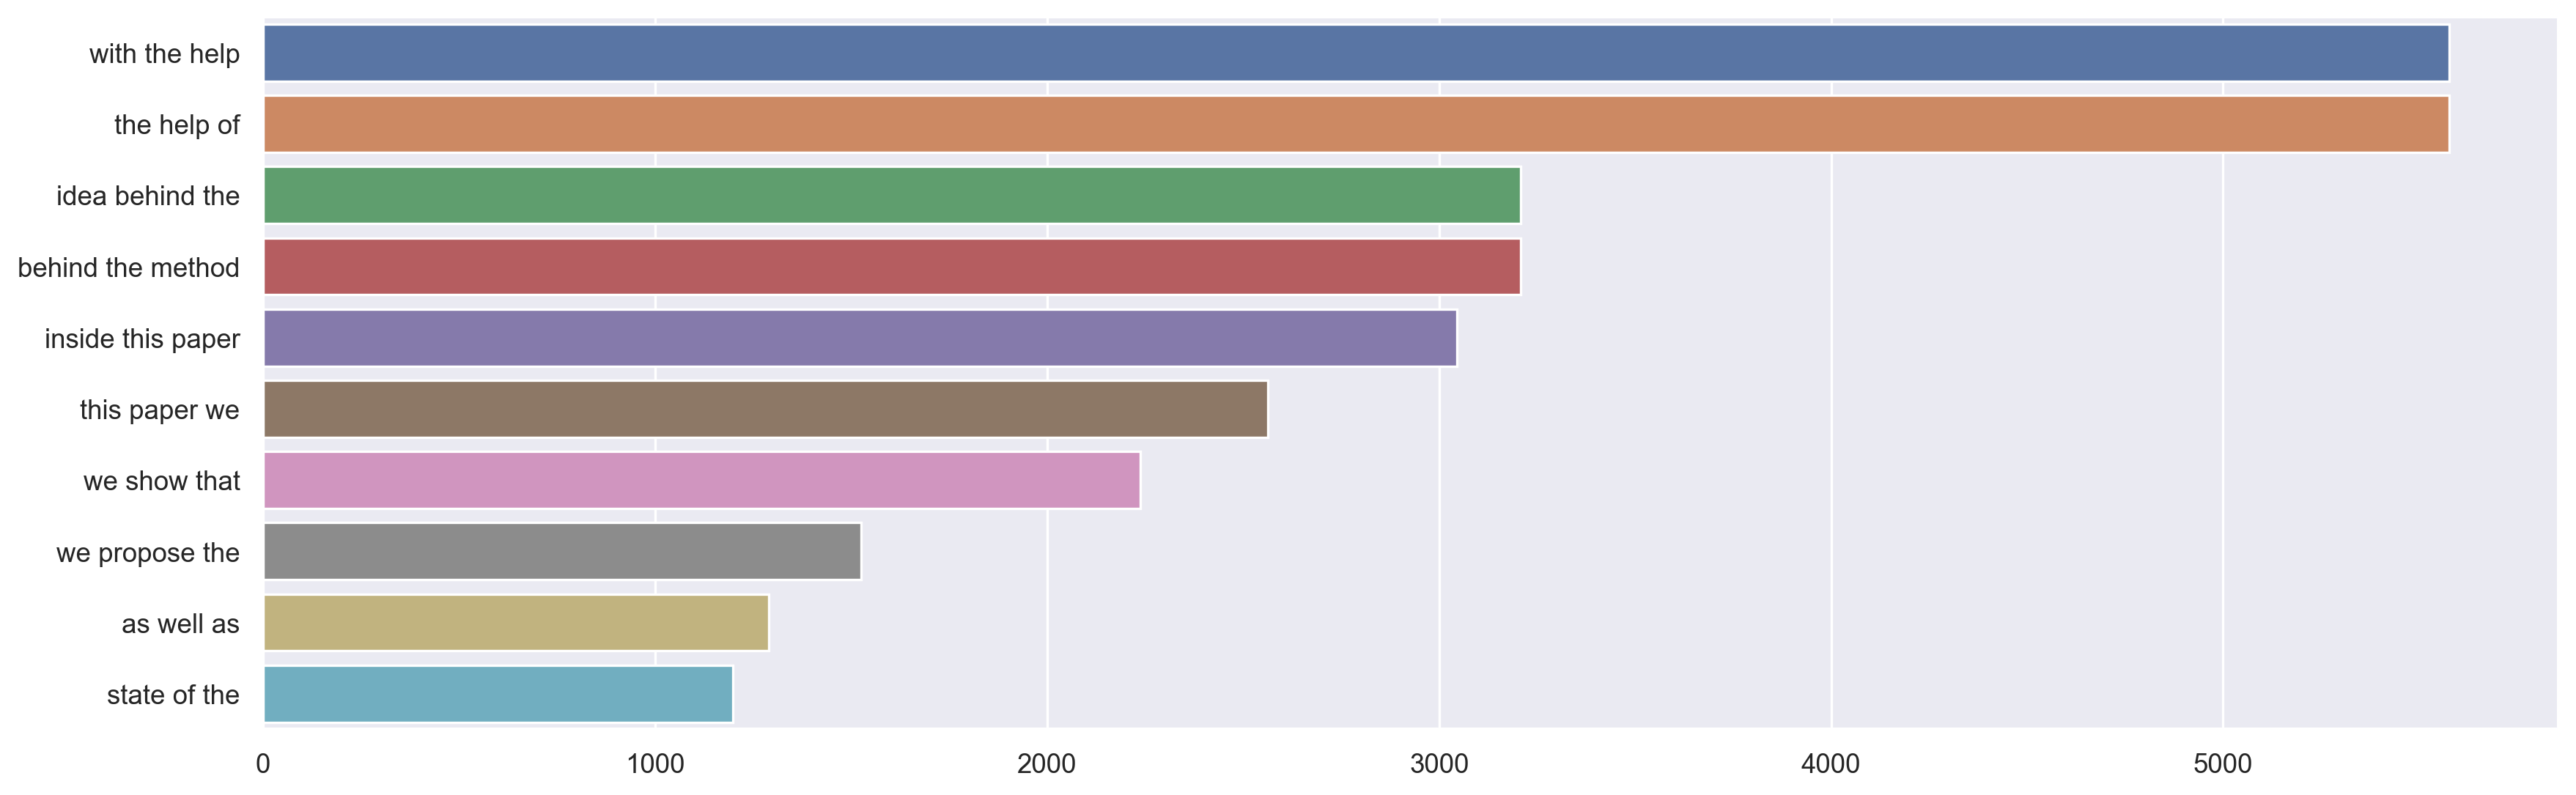

In [16]:
# plot trigrams
get_top_ngram(df_train['ABSTRACT'], 3)

------------------------